In [5]:
import pandas as pd
import numpy as np

In [6]:
telco = pd.read_csv('C://Users/mkrijal/Desktop/Assignment1/Telco-Customer-Churn.csv')
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [8]:
telco['TotalCharges'] = pd.to_numeric(telco['TotalCharges'].str.replace(' ',''), errors='force') #change obj to float

In [9]:
from scipy.stats import mode

mode(telco['TotalCharges'])

telco['TotalCharges'].fillna(mode(telco['TotalCharges']).mode[0], inplace=True) #input missing values

In [10]:
telco['TotalCharges'].dtypes

dtype('float64')

In [11]:
telco_cust = telco[['gender', 'SeniorCitizen', 'Partner', 'Dependents','tenure','MonthlyCharges','TotalCharges','Churn']]
telco_cust.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,29.85,29.85,No
1,Male,0,No,No,34,56.95,1889.50,No
2,Male,0,No,No,2,53.85,108.15,Yes
3,Male,0,No,No,45,42.30,1840.75,No
4,Female,0,No,No,2,70.70,151.65,Yes


In [12]:
telco_cust.groupby(telco_cust['gender']).size()

gender
Female    3488
Male      3555
dtype: int64

In [13]:
telco_cust.groupby(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Churn']).size()

gender  SeniorCitizen  Partner  Dependents  Churn
Female  0              No       No          No       909
                                            Yes      429
                                Yes         No       110
                                            Yes       32
                       Yes      No          No       482
                                            Yes      114
                                Yes         No       720
                                            Yes      124
        1              No       No          No       159
                                            Yes      158
                                Yes         No         2
                                            Yes        1
                       Yes      No          No       136
                                            Yes       73
                                Yes         No        31
                                            Yes        8
Male    0              No       No    

In [14]:
#function min and max
def get_stats(group):
    return {'min': group.min(), 'max': group.max()}

#group MonthlyCharges by gender and generation
telco_cust['MonthlyCharges'].groupby([telco_cust['gender'], telco_cust['SeniorCitizen']]).apply(get_stats)

gender  SeniorCitizen     
Female  0              max    118.75
                       min     18.40
        1              max    117.45
                       min     18.95
Male    0              max    118.35
                       min     18.25
        1              max    116.50
                       min     19.20
Name: MonthlyCharges, dtype: float64

In [15]:
telco_cust['TotalCharges'].groupby([telco_cust['gender'], telco_cust['SeniorCitizen']]).mean()

gender  SeniorCitizen
Female  0                2171.018031
        1                2839.934067
Male    0                2182.981214
        1                2781.304355
Name: TotalCharges, dtype: float64

In [16]:
sort_month = telco_cust.sort_values('MonthlyCharges', ascending = False)
sort_month.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,MonthlyCharges,TotalCharges,Churn
4586,Female,0,Yes,Yes,72,118.75,8672.45,No
2115,Female,0,No,No,71,118.65,8477.60,No
3894,Female,0,Yes,No,68,118.60,7990.05,No
4804,Female,0,No,No,61,118.60,7365.70,No
5127,Male,0,No,No,67,118.35,7804.15,Yes


In [17]:
sort_total = telco_cust.sort_values('TotalCharges', ascending = False)
sort_total.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,MonthlyCharges,TotalCharges,Churn
4610,Male,0,Yes,No,72,117.80,8684.80,Yes
4586,Female,0,Yes,Yes,72,118.75,8672.45,No
6768,Female,0,Yes,Yes,72,117.50,8670.10,No
5347,Male,0,Yes,No,72,116.95,8594.40,No
2187,Male,0,Yes,No,71,116.25,8564.75,No


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

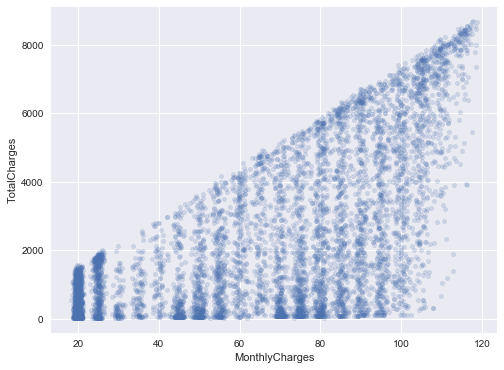

In [19]:
# Pandas scatter plot
sort_total.plot(kind='scatter', x='MonthlyCharges', y='TotalCharges', alpha=0.2)

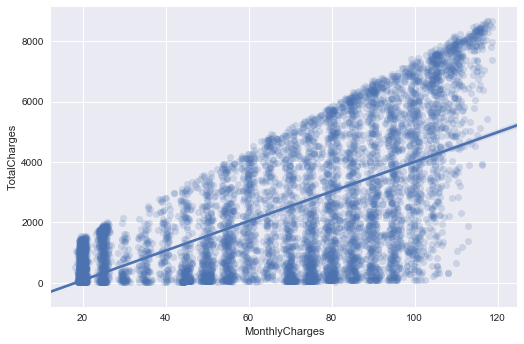

In [20]:
# Seaborn scatter plot with regression line
sns.lmplot(x='MonthlyCharges', y='TotalCharges', data=sort_total, aspect=1.5, scatter_kws={'alpha':0.2})

In [21]:
# create X and y
feature_cols = ['MonthlyCharges']
X = sort_total[feature_cols]
y = sort_total.TotalCharges

In [22]:
# import, instantiate, fit
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
print (linreg.intercept_)
print (linreg.coef_)

-897.087765341
[ 49.05451815]


In [24]:
# manually calculate the prediction
linreg.intercept_ + linreg.coef_*100 #predict if monthly charges is 100

array([ 4008.36404924])

In [25]:
# use the predict method
linreg.predict(100)

array([ 4008.36404924])

In [26]:
def num(strA):  #change string to numbers
    if strA == 'Yes':
        return 1
    elif strA == 'Male':
        return 1
    else:
        return 0

In [27]:
sort_total['Churn'] = sort_total['Churn'].apply(num)
sort_total['gender'] = sort_total['gender'].apply(num)
sort_total.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,MonthlyCharges,TotalCharges,Churn
4610,1,0,Yes,No,72,117.80,8684.80,1
4586,0,0,Yes,Yes,72,118.75,8672.45,0
6768,0,0,Yes,Yes,72,117.50,8670.10,0
5347,1,0,Yes,No,72,116.95,8594.40,0
2187,1,0,Yes,No,71,116.25,8564.75,0


In [28]:
# explore more features
feature_cols = ['gender','SeniorCitizen','MonthlyCharges', 'tenure', 'Churn']

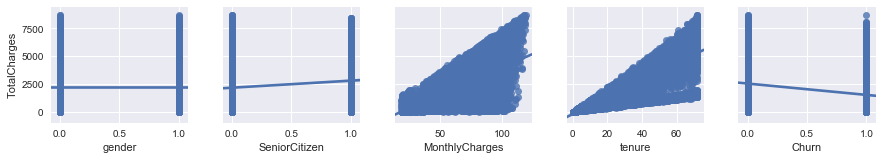

In [29]:
# multiple scatter plots in Seaborn
sns.pairplot(sort_total, x_vars=feature_cols, y_vars='TotalCharges', kind='reg')

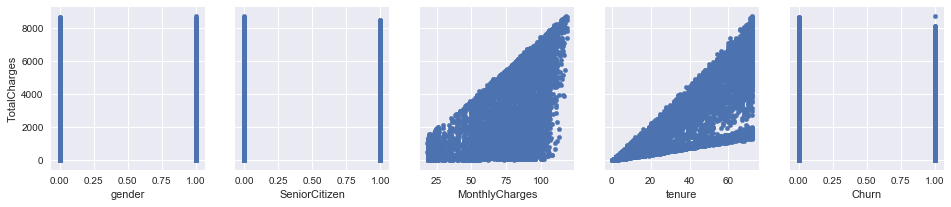

In [30]:
# multiple scatter plots in Pandas
fig, axs = plt.subplots(1, len(feature_cols), sharey=True)
for index, feature in enumerate(feature_cols):
    sort_total.plot(kind='scatter', x=feature, y='TotalCharges', ax=axs[index], figsize=(16, 3))

In [31]:
# cross-tabulation of season and month
pd.crosstab([sort_total.gender, sort_total.SeniorCitizen, sort_total.Churn], sort_total.TotalCharges)

TotalCharges                18.80    18.85    18.90    19.00    19.05    \
gender SeniorCitizen Churn                                                
0      0             0            0        1        0        1        0   
                     1            0        0        0        0        0   
       1             0            0        0        0        0        0   
                     1            0        0        0        0        0   
1      0             0            1        0        1        0        1   
                     1            0        1        0        0        0   
       1             0            0        0        0        0        0   
                     1            0        0        0        0        0   

TotalCharges                19.10    19.15    19.20    19.25    19.30    \
gender SeniorCitizen Churn                                                
0      0             0            1        1        0        2        0   
                     1            1        0        0        0        1   
       1             0            0        0        0        0        0   
                     1            0        0        0        0        0   
1      0             0            1        0        4        0        2   
                     1            0        0        0        1        1   
       1             0            0        0        0        0        0   
                     1            0        0        0        0        0   

TotalCharges                 ...     8477.70  8496.70  8529.50  8543.25  \
gender SeniorCitizen Churn   ...                                          
0      0             0       ...           1        1        1        1   
                     1       ...           0        0        0        0   
       1             0       ...           0        0        0        0   
                     1       ...           0        0        0        0   
1      0             0       ...           0        0        0        0   
                     1       ...           0        0        0        0   
       1             0       ...           0        0        0        0   
                     1       ...           0        0        0        0   

TotalCharges                8547.15  8564.75  8594.40  8670.10  8672.45  \
gender SeniorCitizen Churn                                                
0      0             0            0        0        0        1        1   
                     1            0        0        0        0        0   
       1             0            0        0        0        0        0   
                     1            0        0        0        0        0   
1      0             0            1        1        1        0        0   
                     1            0        0        0        0        0   
       1             0            0        0        0        0        0   
                     1            0        0        0        0        0   

TotalCharges                8684.80  
gender SeniorCitizen Churn           
0      0             0            0  
                     1            0  
       1             0            0  
                     1            0  
1      0             0            0  
                     1            1  
       1             0            0  
                     1            0  

[8 rows x 6530 columns]

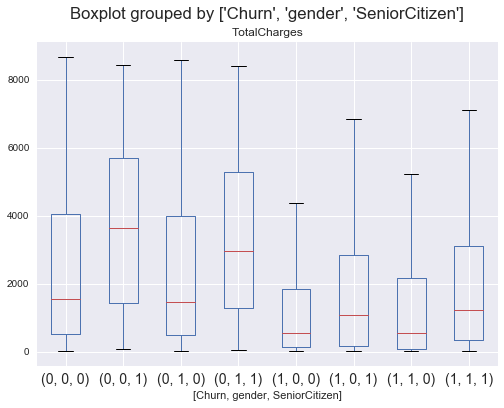

In [32]:
# box plot of rentals, grouped by season
sort_total.boxplot(['TotalCharges'], by=['Churn','gender','SeniorCitizen'])
#gender: male=1,female=0, churn:yes=1,no=0,  Senior Citizen: yes=1, no=0

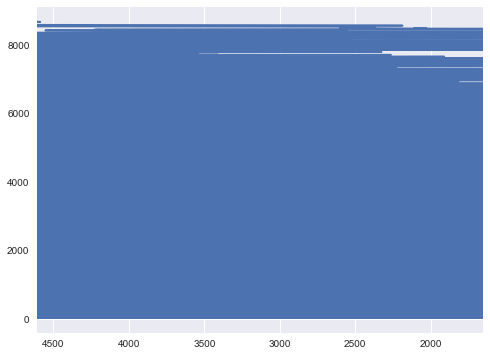

In [33]:
sort_total.TotalCharges.plot()

In [34]:
sort_total.corr()

,gender,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,0.005106,-0.014569,-0.000079,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016567,0.220173,0.103001,0.150889
tenure,0.005106,0.016567,1.000000,0.247900,0.826172,-0.352229
MonthlyCharges,-0.014569,0.220173,0.247900,1.000000,0.651172,0.193356
TotalCharges,-0.000079,0.103001,0.826172,0.651172,1.000000,-0.198335
Churn,-0.008612,0.150889,-0.352229,0.193356,-0.198335,1.000000


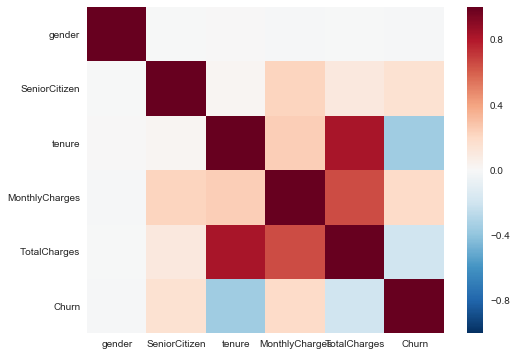

In [35]:
sns.heatmap(sort_total.corr())